In [2]:
# Importar librerías 
import pandas as pd
import requests
import yfinance as yf
import matplotlib.pyplot as plt
from config import a_v_token      # archivo de python con el api key de alpha vantage

_(Imagen de referencia del dashboard)_
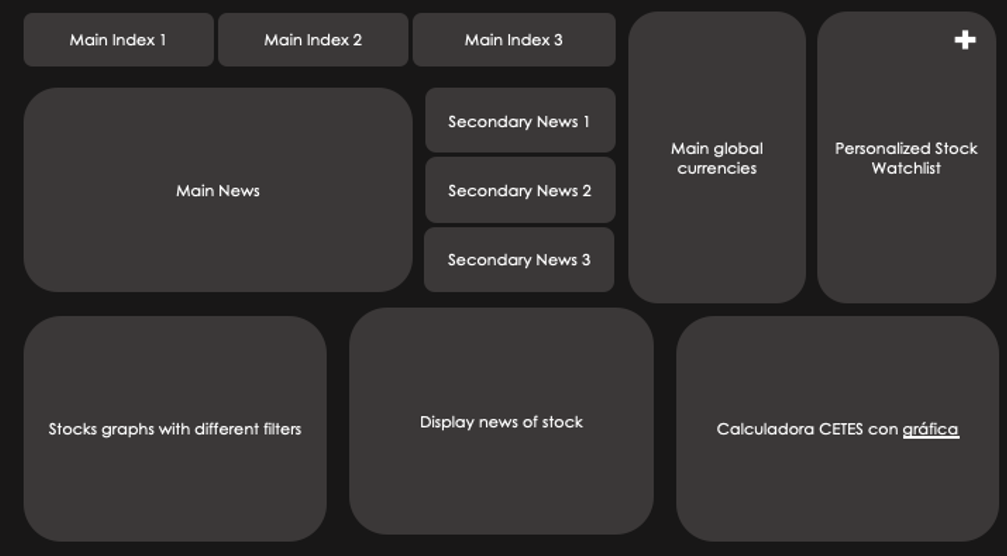

___
**`GRÁFICAS DE ACCIONES CON FILTROS`**

Ticker: AAPL
Fecha de inicio (AAAA-MM-DD): 2020-01-01
Fecha de cierre (AAAA-MM-DD): 2023-01-01
[*********************100%%**********************]  1 of 1 completed


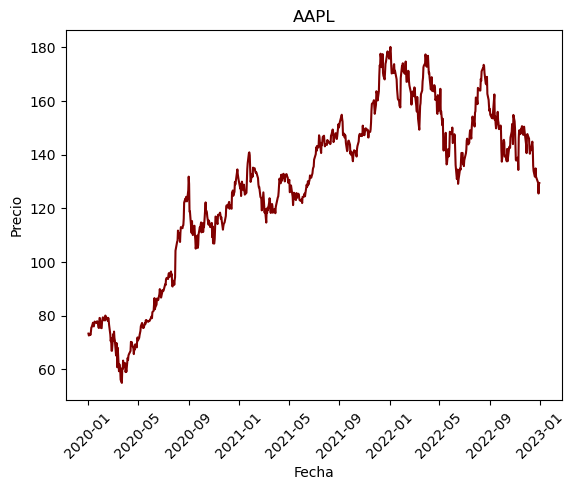

In [13]:
# Definir ticker y fechas
ticker = input('Ticker: ')
st_date = input('Fecha de inicio (AAAA-MM-DD): ')
end_date = input('Fecha de cierre (AAAA-MM-DD): ')

# Obtener los datos
data = yf.download(ticker, st_date, end_date)

# Graficar
plt.plot(data['Adj Close'], c='maroon')
plt.title(ticker)
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.xticks(rotation = 45)
plt.show()

___
**`NOTICIAS DE LA ACCIÓN`**

Se utiliza la biblioteca `newspaper3k` que proporciona un método para generar el resumen de un artículo dada su liga que se obtiene a través del API de *alpha vantage*. Está inspirada en la librería `requests`, herramienta para realizar peticiones a servidores web, así como interactuar con Interfaces de Programación de Aplicaciones (APIs) y extraer contenido de páginas web (*web scraping*), e impulasda por ,a librería `lxml`, utilizada para el procesamiento de *XML* y *HTML*, que son lenguajes utilizados para estructurar y representar información en documentos web.

El resumen que se obtiene es una versión condensada de los puntos principales y la información clave del artículo, esto se logra mediante un algoritmo que determina qué oraciones en el artículo son las más importantes o representativas, combinando técnicas de procesamiento de lenguaje natural como las longitudes de oraciones, frecuencia de palabras y posición dentro del artículo. Esto quiere decir que `newspaper3k` extrae y analiza el contenido, lo divide en frases (tokenización), eliminar palabras comunes (*stopwords* en inglés) y realiza limpieza pertinente. Se puntean las frases según su importancia de acuedo a la frecuencia de las palabras, su posición y longitud. Así, se seleccionan de oraciones clave para que, al combinarlas, se obtenga un resumen.

In [14]:
# Para tener las noticias en español
from googletrans import Translator
translator = Translator()

In [15]:
def translate(text):
    return translator.translate(text , dest ='es').text 

In [16]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers={ticker}&time_from={st_date.replace('-', '')+'T0000'}&limit=3&sort=RELEVANCE&apikey={a_v_token}"
r = requests.get(url)
data = r.json()

In [17]:
[translate(data['feed'][i]['summary']) for i in range(5)]

['La disputa por mensajes de texto entre Google y Apple se niega a calmarse. Ahora, la empresa GOOG GOOG, propiedad de Alphabet Inc., ha lanzado un nuevo comercial "iPager" que se burla de Apple por mostrar mensajes de Android en burbujas verdes. Qué pasó: Google ha estado intentando presionar a Apple Inc.',
 'El gigante tecnológico Apple Inc AAPL presentó oficialmente el iPhone 15 el 12 de septiembre en un evento de la empresa. Ahora que el iPhone está oficialmente a la venta, un analista comparte una actualización sobre lo que le espera a la compañía. El analista de Apple: el analista de Wedbush, Daniel Ives, tiene una calificación de rendimiento superior a Apple y un precio...',
 'Apple Inc. AAPL habría ofrecido aumentos salariales menores a sus empleados minoristas este año, volviendo a los niveles previos a la pandemia, con aumentos anuales promedio, en contraste con los aumentos salariales atípicos durante la pandemia de COVID-19.',
 'Elon Musk ha expresado su intención de compra

___
**`PRINCIPALES NOTICIAS DADO UN TEMA`**

In [18]:
# Seleccionar tema
topic = input('Tema: ')

url = f'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&topics={topic}&limit=4&sort=RELEVANCE&apikey={a_v_token}'
r = requests.get(url)
data = r.json()

# Obtener las ligas
links = [data['feed'][i]['url'] for i in range(4)]

Tema: blockchain


In [19]:
# Librerías
from newspaper import Article
import nltk
nltk.download()                        # verificar que esté descargado

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

*Código inspirado de [towardsdatascience.com](https://towardsdatascience.com/scrape-and-summarize-news-articles-in-5-lines-of-python-code-175f0e5c7dfc) (Artem, 2019)*

In [20]:
def get_summary(link):
    # Web Scrapping 
    article = Article(link)
    article.download()
    article.parse()
    article.nlp()
    return article.summary

In [21]:
for new in range(len(links)):
    print(translate(get_summary(links[new])))
    print()

“Este no es un tipo cualquiera con una bolsa de lona” vendiendo fentanilo a la luz del día.
Martín Urista/APEl Cartel de Sinaloa ha ganado cientos de millones de dólares con el comercio de fentanilo, según el Departamento de Justicia.
Una investigación reciente de CNN investigó las actividades de las empresas químicas chinas sancionadas por Estados Unidos que anuncian ingredientes de fentanilo.
Una de las empresas, Elliptic, con sede en Londres, encontró 100 empresas químicas con sede en China promocionando fentanilo, ingredientes o equipos de fentanilo para fabricar medicamentos que aceptaban pagos en criptomonedas.
Elliptic no identificó ninguna cuenta criptográfica controlada por un cartel que enviara dinero a las empresas chinas.

Pero, ¿qué significa realmente y cómo se extrae Bitcoin?
Aproximadamente cada cuatro años, la recompensa por extraer Bitcoin se reduce a la mitad, un evento conocido (como era de esperar) como “reducción a la mitad”.
La represión de la minería de Bitcoin 

___
**`PRINCIPALES MONEDAS GLOBALES`**

In [19]:
vs_currency = 'USD'
currencies = ['MXN','AUD','JPY', 'GBP']

currency_names = []
exchange_rate = {}
bid_price = {}
ask_price ={}

for c in currencies:
    url = f"https://www.alphavantage.co/query?function=CURRENCY_EXCHANGE_RATE&from_currency={c}&to_currency={vs_currency}&apikey={a_v_token}"
    r = requests.get(url)
    data = r.json()
    data = data['Realtime Currency Exchange Rate']
    currency_names.append(f"{c}/{default_currency}")
    exchange_rate[c] = data['5. Exchange Rate']
    bid_price[c] = data['8. Bid Price']
    ask_price[c] = data['9. Ask Price']
    
df = pd.DataFrame({
            'Moneda': currency_names,
            'Tipo de Cambio': exchange_rate.values(),
            'Compra': bid_price.values(),
            'Venta': ask_price.values()
    })
df

,Moneda,Tipo de Cambio,Compra,Venta
0,MXN/USD,0.05805000,0.05804900,0.05805200
1,AUD/USD,0.64376000,0.64374500,0.64376500
2,JPY/USD,0.00673000,0.00672900,0.00673000
3,GBP/USD,1.22390000,1.22387000,1.22392000


___

**`CALCULADORA CETES`**

In [4]:
from cetes import Cetes
from ipywidgets import interact

def cetes_calculator(choice):
    cetes = Cetes(choice)
    return cetes.get_data()

interact(cetes_calculator, choice=['28', '91', '182', '364'])

interactive(children=(Dropdown(description='choice', options=('28', '91', '182', '364'), value='28'), Output()…

<function __main__.cetes_calculator(choice)>

___
**`LISTA PERSONALIZADA DE STOCKS`**

In [15]:
personalized_ticker_list = 'IBM', 'TSLA', 'AAPL', 'PLTR'

open = {}
high = {}
low = {}
price = {}
volume = {}
previous_close = {}
change = {}
change_percent = {}

for t in personalized_ticker_list:
    url = f'https://www.alphavantage.co/query?function=GLOBAL_QUOTE&symbol={t}&apikey={a_v_token}'
    r = requests.get(url)
    data = r.json()
    data = data['Global Quote']
    open[t] = data['02. open']
    high[t] = data['03. high']
    low[t] = data['04. low']
    price[t] = data['05. price']
    volume[t] = data['06. volume']
    previous_close[t] = data['08. previous close']
    change[t] = data['09. change']
    change_percent[t] = data['10. change percent']
    
df = pd.DataFrame({
            'Ticker': personalized_ticker_list,
            'Apertura': open.values(),
            'Alta': high.values(),
            'Baja': low.values(),
            'Precio': price.values(),
            'Volumen': volume.values(),
            'Precio al Ultimo Cierre': previous_close.values(),
            'Cambio': change.values(),
            'Porcentaje de Cambio': change_percent.values()
    })
df

,Ticker,Apertura,Alta,Baja,Precio,Volumen,Precio al Ultimo Cierre,Cambio,Porcentaje de Cambio
0,IBM,147.4100,148.1000,146.8200,146.9100,2562216,147.3800,-0.4700,-0.3189%
1,TSLA,257.4000,257.7888,244.4800,244.8800,127524083,255.7000,-10.8200,-4.2315%
2,AAPL,174.6700,177.0790,174.0500,174.7900,56725385,173.9300,0.8600,0.4945%
3,PLTR,14.2300,14.4150,14.0300,14.1300,47714543,14.0000,0.1300,0.9286%


___
**`PRINCIPALES INDICES (YTD)`**

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


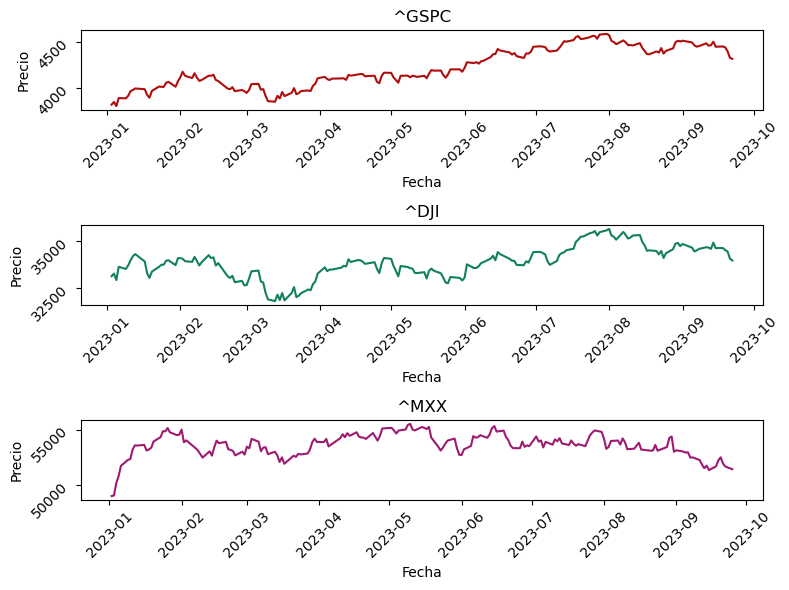

In [22]:
from datetime import datetime

ticker1 = '^GSPC'
ticker2 = '^DJI'
ticker3 = '^MXX'
st_date = datetime(datetime.now().year, 1, 1)
end_date = datetime.now()

# Obtener los datos
data1 = yf.download(ticker1, st_date, end_date)
data2 = yf.download(ticker2, st_date, end_date)
data3 = yf.download(ticker3, st_date, end_date)

# Graficar
fig, axes = plt.subplots(3, 1, figsize=(8, 6))
axes[0].plot(data1['Adj Close'], c='#B00C0C')
axes[0].set_title(ticker1)
axes[1].plot(data2['Adj Close'], c='#10815C')
axes[1].set_title(ticker2)
axes[2].plot(data3['Adj Close'], c='#9E1A70')
axes[2].set_title(ticker3)
for ax in range(3):
    axes[ax].set_xlabel('Fecha')
    axes[ax].set_ylabel('Precio')
    axes[ax].tick_params(labelrotation=45)
plt.tight_layout()
plt.show()